<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/EX20_1_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN으로 MNIST 데이터 처리하기 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#MNIST 데이터 불러오기
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test)= mnist.load_data()

**데이터 탐색**

In [41]:
x_train.shape, y_train.shape #훈련데이터 60,000개

((60000, 28, 28), (60000,))

In [42]:
x_test.shape, y_test.shape #테스트데이터 10,000개

((10000, 28, 28), (10000,))

In [43]:
x_train[0] #첫번째 이미지 행렬 출력

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

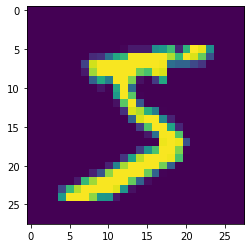

In [44]:
plt.imshow(x_train[0]) #첫번째 이미지 시각화
plt.show()

**데이터 전처리**

In [45]:
x_train[0].shape #첫번째 이미지 모양체크

(28, 28)

In [46]:
#데이터 모양 바꾸기
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [47]:
x_train.shape, x_test.shape #훈련, 테스트 데이터 모양 확인

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [48]:
x_train.ndim #데이터의 차원 확인

4

In [49]:
#y값 원핫인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train) #categorical crossentropy 사용해야 함
y_test = to_categorical(y_test)

**모델 구축**

In [50]:
#신경망 모델 구축
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, 3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary() #모델 요약

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


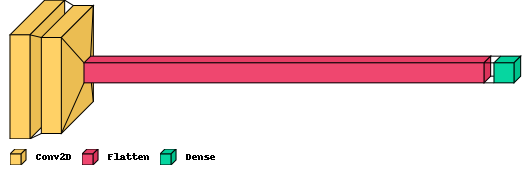

In [66]:
# !pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True) 

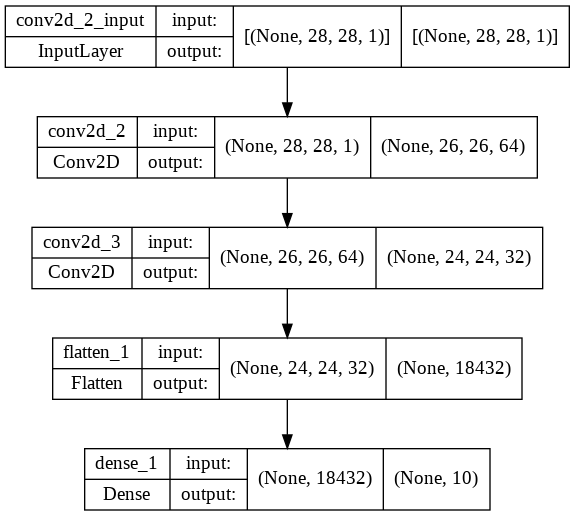

In [68]:
from keras.utils.vis_utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #컴파일

**학습**

In [52]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3) #훈련

Epoch 1/3
1875/1875 [==============================] - 188s 100ms/step - loss: 0.2246 - accuracy: 0.9513 - val_loss: 0.0885 - val_accuracy: 0.9734
Epoch 2/3
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0685 - accuracy: 0.9796 - val_loss: 0.0753 - val_accuracy: 0.9772
Epoch 3/3
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.1013 - val_accuracy: 0.9749


**평가**

In [53]:
#모델평가
score = model.evaluate(x_test, y_test) 
print('{}: {:.4f}'.format(model.metrics_names[0], score[0])) #오차값
print('{}: {:.4f}'.format(model.metrics_names[1], score[1])) #정확도

313/313 [==============================] - 7s 23ms/step - loss: 0.1013 - accuracy: 0.9749
loss: 0.1013
accuracy: 0.9749


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(x_test) #예측값
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)) #정확도

0.9749

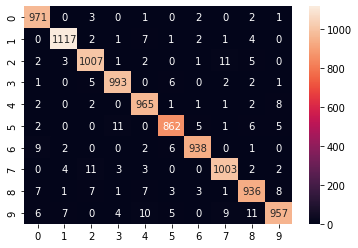

In [63]:
#혼동행렬
cfm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cfm, annot=True, fmt='g')
plt.show()

In [64]:
#분류리포트
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



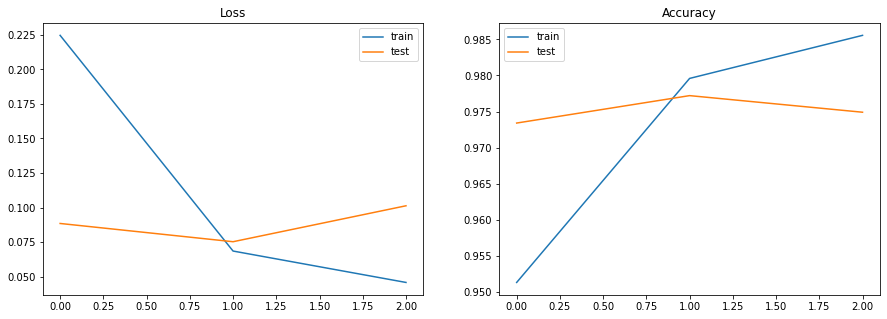

In [54]:
#히스토리 그래프
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [28]:
#테스트 데이터 4개로 예측
test_data = x_test[:4]
np.argmax(model.predict(test_data), axis=1)

array([7, 2, 1, 0])

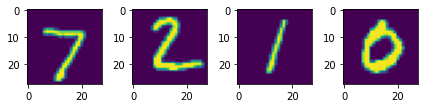

In [34]:
#예측이 잘 됐는지 확인
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x_test[i].reshape(28,28))
plt.tight_layout()    
plt.show()